<a href="https://colab.research.google.com/github/tobiasras/dbark_notebooks/blob/main/graf_fra_%C3%A5rshjul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

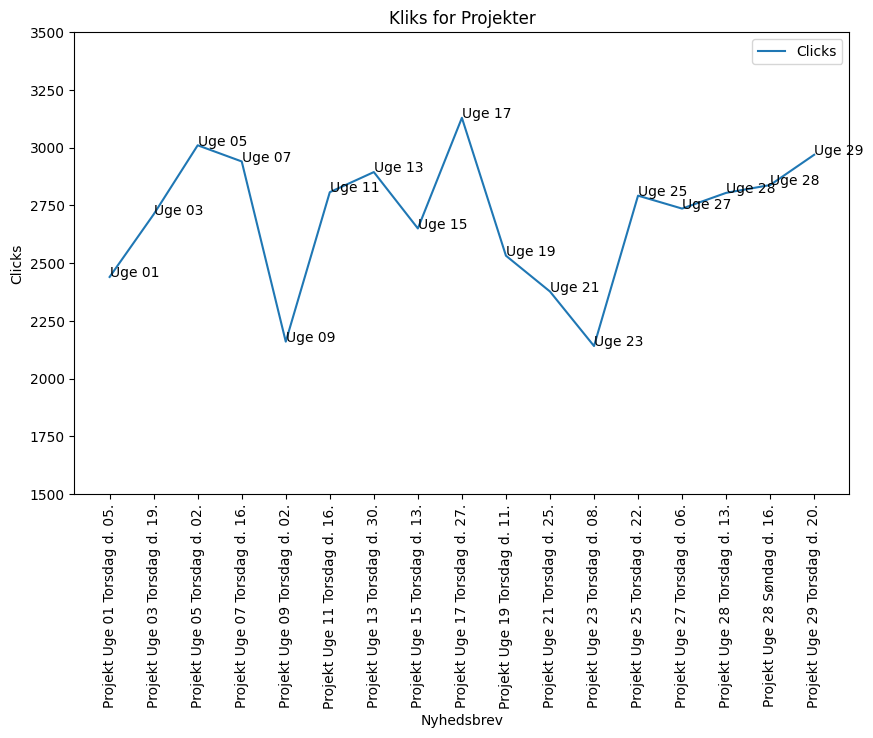

In [ ]:
#@title {display-mode: "form"}
#@markdown ## **Værktøj til oprettelse af grafer**
#@markdown Dataen er direkte fra årshjulet 2023

#@markdown **Link til årshjul:** \
#@markdown https://docs.google.com/spreadsheets/d/1FlfW_4Zo96Yiilr_WTDchGAzLNLxgNpbSrnGKIXpYxs/edit?usp=sharing


from prompt_toolkit.styles import named_colors
from sqlalchemy.sql.expression import null
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default

creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('Årshjul med indhold').sheet1

#@markdown **Vælg indhold fra dropdown menuen**
name_of_content = "Projekter" #@param ["Årets bedste", "Projekter", "Indhold", "Podcast", "RA"] {allow-input: true}

#@markdown **Disse to felter bruges til at styre y feltet på grafen**
y_min = 1500 #@param {type: "number"}
y_max = 3500 #@param {type: "number"}



clicks = []
weeks = []
types = []
names = []

def getDatafromRow(row_num):
  click = worksheet.acell('O'+str(row_num)).value

  if (click == ''): return

  clicks.append(click)

  week = worksheet.acell('A'+str(row_num)).value
  weeks.append(week)

  content = worksheet.acell('C'+str(row_num)).value
  types.append(content)

  if (content != 'Projekter'):
    name = worksheet.acell('D'+str(row_num)).value
    names.append(name)
  else:
    names.append("Projekt " + week + " " + worksheet.acell('B'+str(row_num)).value)


for cell in worksheet.findall(name_of_content):
  data = getDatafromRow(cell.row)


import pandas as pd
dataframe = pd.DataFrame({
  'uge': weeks,
  'indhold':types,
  'navn': names,
  'kliks': clicks
})

import matplotlib.pyplot as plt

dataframe['kliks'] = dataframe['kliks'].astype(int)

plt.figure(figsize=(10, 6))

plt.plot(dataframe['navn'], dataframe['kliks'], label='Clicks')

texts = []
for i, txt in enumerate(dataframe['uge']):
    texts.append(plt.text(dataframe['navn'][i], dataframe['kliks'][i], txt))


plt.xlabel('Nyhedsbrev')
plt.ylabel('Clicks')
plt.title('Kliks for ' + name_of_content)

plt.ylim(y_min, y_max)

plt.legend()

plt.xticks(rotation=90)

plt.show()



In [ ]:
#@title {display-mode: "form"}

dataframe

,uge,indhold,navn,kliks
0,Uge 02,RA,Rasmus Bak Wood House,2280
1,Uge 04,RA,Anders B Hazel Thicket,1433
2,Uge 06,RA,Anders B Bog Hill Road,2327
3,Uge 08,RA,M. Dalgaards stram lokalplan,1698
4,Uge 10,RA,LBR Modernistisk perle,2003
5,Uge 12,RA,NB Sommerhus i skoven,1611
6,Uge 14,RA,LBR Atrium familiehus,1672
7,Uge 16,RA,JK Åndehuls sommerhus,1918
8,Uge 18,RA,Lundhild villa med pool,1522
9,Uge 20,RA,EN renovering af 60'er villa,1067
